In [1]:
from morphSimilarity_weighted import *
from neighborJoining import *

import numpy as np
from pathlib import Path
from skimage import io
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
from skimage import measure
from skimage.future import graph
import networkx as nx
from scipy import ndimage
import sys
import pickle
from tqdm.notebook import tqdm
from pymks import PrimitiveTransformer, TwoPointCorrelation
from sklearn.pipeline import Pipeline

%reload_ext autoreload
%autoreload 2
%matplotlib inline

compute distance function parameters

In [2]:
image_set_directory=['/home/namit/data/extreme_aspect_ratio_reduced/10x80/',
                     '/home/namit/data/extreme_aspect_ratio_reduced/80x10/',
                     '/home/namit/data/extreme_aspect_ratio_reduced/10x10/',
                     '/home/namit/data/extreme_aspect_ratio_reduced/80x80/']

# image_set_directory = '/home/namit/data/thin_films_numbered'



# signature_function='surface_volume_ratio_sig'
signature_function='shape_ratio_sig'
# signature_function='fractal_dimension_sig'

visualize_graphs=False
weighted=False
cosine=False

compute the distance matrix

In [ ]:
distances = compute_distance(image_set_directory, signature_function, visualize_graphs, weighted, cosine)

/home/namit/data/extreme_aspect_ratio_reduced/10x80/1.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/10x80/2.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/10x80/3.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/10x80/4.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/80x10/1.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/80x10/2.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/80x10/3.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/80x10/4.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/10x10/1.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/10x10/2.png
Pruned 0 component(s)
/home/namit/data/extreme_aspect_ratio_reduced/10x10/3.png


plot the distance matrix

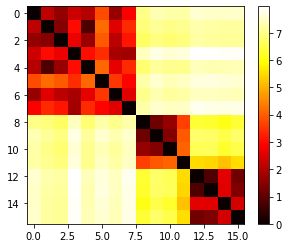

In [8]:
plt.imshow(distances, cmap='hot')
cbar = plt.colorbar(fraction=0.046, pad=0.04)

upgma clustering from distance matrix

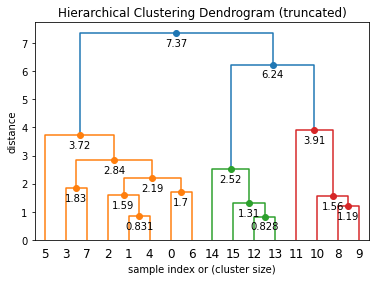

In [9]:
plot_fancy_dendogram(distances)

Total components in each morph:  [60, 51]


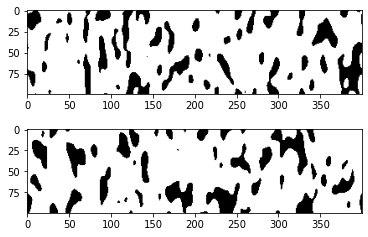

In [51]:
print("Total components in each morph: ", [len(i) for i in image_vectors])

imgs = [io.imread(p) for p in Path(image_set_directory).iterdir()]
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(imgs[0], cmap='gray')
ax = fig.add_subplot(212)
ax.imshow(imgs[1], cmap='gray')


visualizing indivisual components

In [40]:
rags[0].nodes[i+1]

{'labels': [62],
 'pixel count': 4,
 'mean color': array([0., 0., 0.]),
 'weight': 0.5}

In [13]:
image_num = 1
print(len(components[image_num]))
print(int(len(components[image_num])/2))

51
25


In [20]:
# plt.imshow(components[1][0])
regions = measure.regionprops(components[1][0].astype(np.int64))


In [23]:
regions[0]['BoundingBox']

(0, 0, 1, 2)

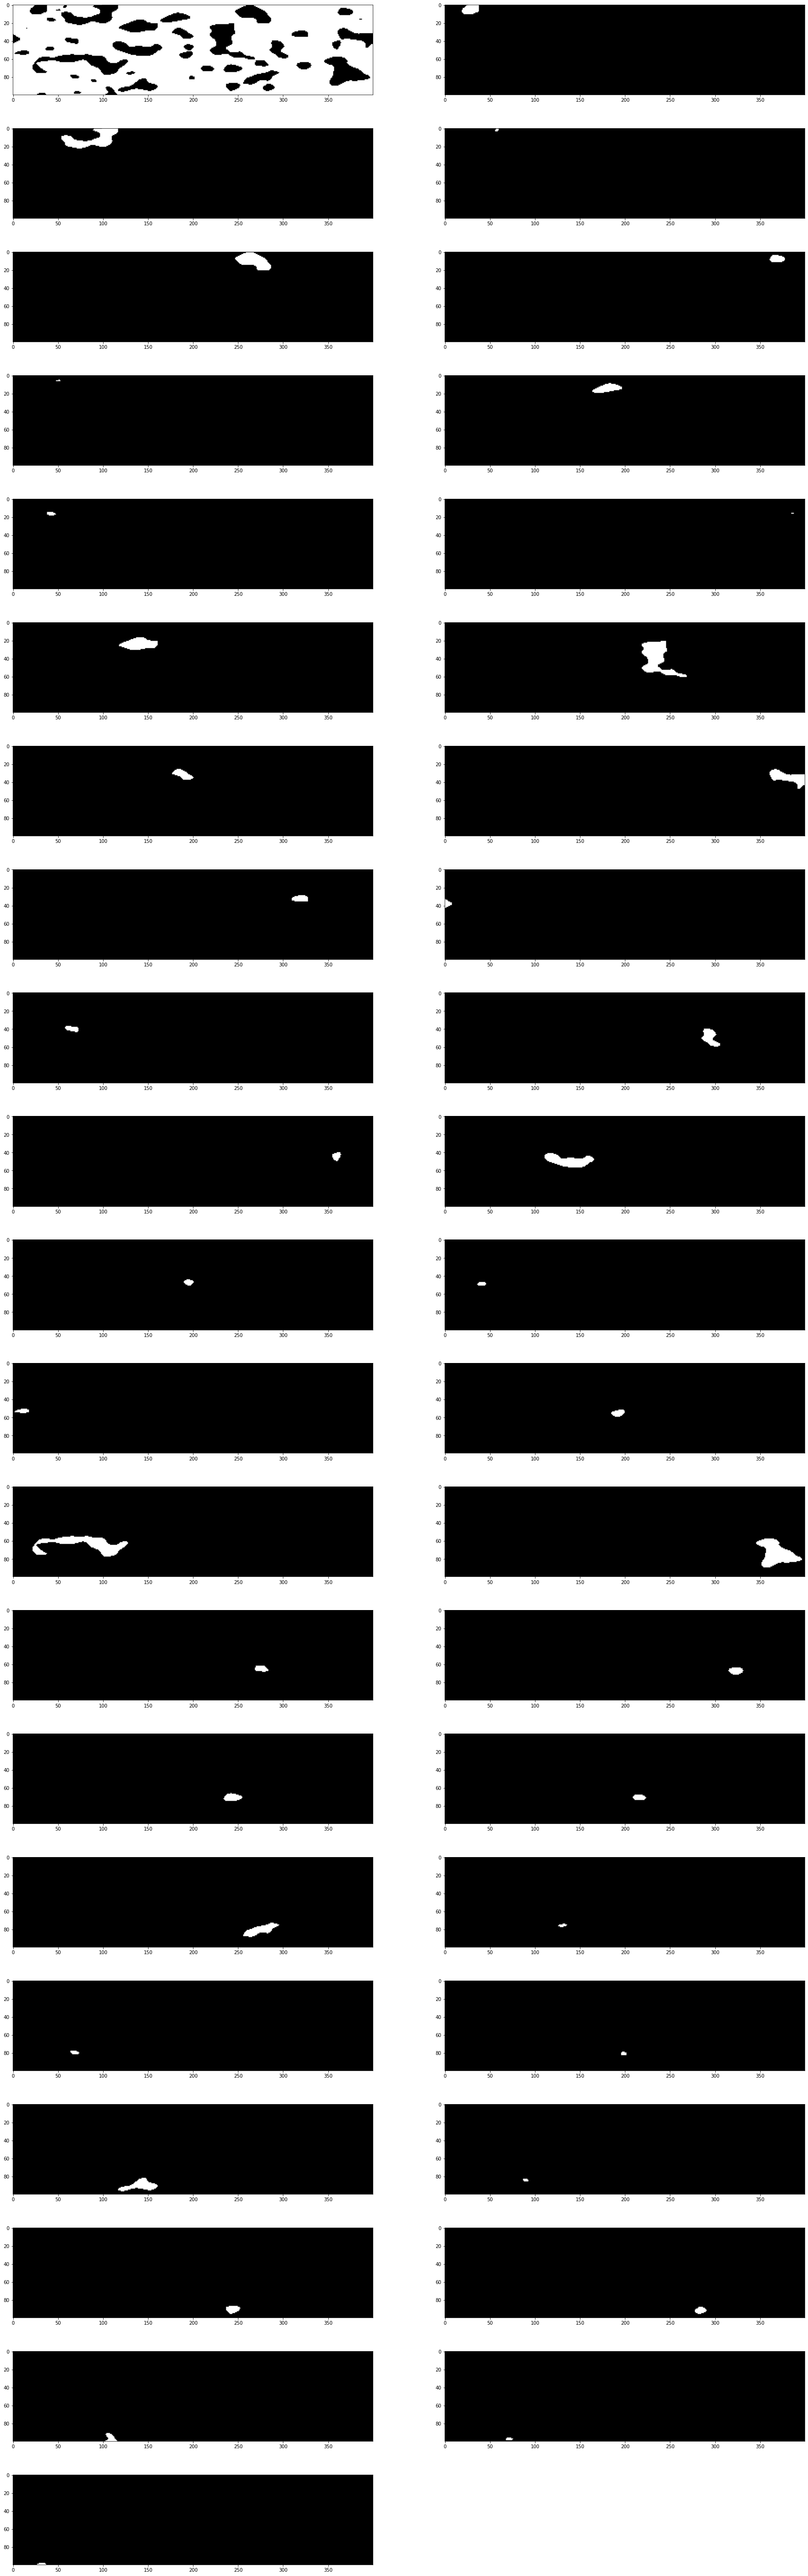

In [38]:
# plot each component individualy
image_num = 1
fig = plt.figure(figsize=(30,100))
for i in range(len(components[image_num])):
    ax = fig.add_subplot(int(len(components[image_num])/2)+1, 2, i+1)
    ax.imshow(components[image_num][i], cmap='gray')
#     ax.set_title(f"pixel count {rags[image_num].nodes[i+1]['pixel count']}, mean color {rags[image_num].nodes[i+1]['mean color']}")